In [1]:
import pandas as pd
import sqlite3
import numpy as np

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm.auto import tqdm
import warnings
import swifter
warnings.filterwarnings('ignore')
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=4)
import seaborn as sns
from matplotlib import pyplot as plt

tqdm.pandas()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
temp_graphs = {
    '150-70': {'подающий': [(-26,130),(-25,130),(-24,130),(-23,130),(-22,130),(-21,130),(-20,130),
                            (-19,130),(-18,130),(-17,130),(-16,127),(-15,124),(-14,122),(-13,119),
                            (-12,117),(-11,114),(-10,111),(-9,109),(-8,106),(-7,103),(-6,101),(-5,98),
                            (-4,95),(-3,93),(-2,90),(-1,87),(-0,85),(1,82),(2,79),(3,76),(4,75),
                            (5,75),(6,75),(7,75),(8,75)],
                 'обратный': [(-26,56),(-25,57),(-24,58),(-23,59),(-22,60),(-21,61),(-20,62),
                            (-19,63),(-18,64),(-17,65),(-16,64),(-15,63),(-14,62),(-13,61),
                            (-12,60),(-11,59),(-10,58),(-9,57),(-8,56),(-7,55),(-6,54),(-5,53),
                            (-4,52),(-3,51),(-2,50),(-1,49),(-0,48),(1,48),(2,48),(3,48),(4,48),
                            (5,48),(6,48),(7,48),(8,48)]},
    '*150-70': {'подающий': [(-26,130),(-25,130),(-24,130),(-23,130),(-22,130),(-21,130),(-20,130),
                            (-19,130),(-18,130),(-17,130),(-16,128),(-15,125),(-14,123),(-13,120),
                            (-12,118),(-11,115),(-10,112),(-9,110),(-8,107),(-7,105),(-6,102),(-5,100),
                            (-4,97),(-3,94),(-2,92),(-1,89),(-0,87),(1,84),(2,81),(3,79),(4,77),
                            (5,77),(6,77),(7,77),(8,77)],
                 'обратный': [(-26,57),(-25,58),(-24,59),(-23,60),(-22,61),(-21,62),(-20,63),
                            (-19,64),(-18,65),(-17,66),(-16,65),(-15,64),(-14,63),(-13,62),
                            (-12,61),(-11,60),(-10,59),(-9,58),(-8,57),(-7,56),(-6,55),(-5,54),
                            (-4,53),(-3,52),(-2,51),(-1,50),(-0,49),(1,48),(2,48),(3,48),(4,48),
                            (5,48),(6,48),(7,48),(8,48)]},
    '130-70': {'подающий': [(-26,130),(-25,129),(-24,128),(-23,126),(-22,124),(-21,122),(-20,119),
                            (-19,117),(-18,115),(-17,113),(-16,111),(-15,109),(-14,107),(-13,104),
                            (-12,102),(-11,100),(-10,98),(-9,96),(-8,93),(-7,91),(-6,89),(-5,87),
                            (-4,85),(-3,82),(-2,80),(-1,78),(-0,76),(1,73),(2,71),(3,70),(4,70),
                            (5,70),(6,70),(7,70),(8,70)],
                 'обратный': [(-26,70),(-25,69),(-24,69),(-23,68),(-22,68),(-21,67),(-20,66),
                            (-19,65),(-18,64),(-17,63),(-16,63),(-15,62),(-14,61),(-13,60),
                            (-12,59),(-11,58),(-10,57),(-9,57),(-8,56),(-7,55),(-6,54),(-5,53),
                            (-4,52),(-3,51),(-2,50),(-1,49),(-0,48),(1,47),(2,46),(3,45),(4,45),
                            (5,45),(6,45),(7,45),(8,45)]},
    '120-70': {'подающий': [(-26,120),(-25,119),(-24,118),(-23,116),(-22,114),(-21,112),(-20,111),
                            (-19,109),(-18,107),(-17,105),(-16,103),(-15,101),(-14,99),(-13,97),
                            (-12,95),(-11,93),(-10,91),(-9,89),(-8,87),(-7,85),(-6,83),(-5,81),
                            (-4,79),(-3,77),(-2,75),(-1,73),(-0,71),(1,68),(2,66),(3,64),(4,62),
                            (5,60),(6,57),(7,55),(8,53)],
                 'обратный': [(-26,70),(-25,69),(-24,69),(-23,68),(-22,67),(-21,67),(-20,66),
                            (-19,65),(-18,64),(-17,63),(-16,62),(-15,61),(-14,61),(-13,60),
                            (-12,59),(-11,58),(-10,57),(-9,56),(-8,55),(-7,54),(-6,53),(-5,52),
                            (-4,51),(-3,50),(-2,49),(-1,48),(-0,47),(1,46),(2,45),(3,44),(4,43),
                            (5,42),(6,41),(7,40),(8,38)]},
    '114-70': {'подающий': [(-26,114),(-25,113),(-24,112),(-23,111),(-22,109),(-21,107),(-20,105),
                            (-19,103),(-18,101),(-17,99),(-16,97),(-15,96),(-14,94),(-13,92),
                            (-12,90),(-11,88),(-10,85),(-9,83),(-8,81),(-7,79),(-6,77),(-5,75),
                            (-4,73),(-3,71),(-2,69),(-1,67),(-0,65),(1,62),(2,60),(3,58),(4,56),
                            (5,53),(6,51),(7,49),(8,46)],
                 'обратный': [(-26,70),(-25,69),(-24,69),(-23,68),(-22,67),(-21,67),(-20,66),
                            (-19,65),(-18,64),(-17,63),(-16,62),(-15,61),(-14,61),(-13,60),
                            (-12,59),(-11,58),(-10,57),(-9,56),(-8,55),(-7,54),(-6,53),(-5,52),
                            (-4,51),(-3,50),(-2,49),(-1,48),(-0,47),(1,46),(2,45),(3,44),(4,43),
                            (5,42),(6,41),(7,40),(8,38)]},
    '105-70': {'подающий': [(-26,105),(-25,104),(-24,103),(-23,102),(-22,100),(-21,98),(-20,96),
                            (-19,95),(-18,93),(-17,91),(-16,89),(-15,88),(-14,86),(-13,84),
                            (-12,82),(-11,81),(-10,79),(-9,77),(-8,75),(-7,73),(-6,71),(-5,70),
                            (-4,68),(-3,66),(-2,64),(-1,62),(-0,60),(1,58),(2,56),(3,54),(4,52),
                            (5,50),(6,48),(7,46),(8,44)],
                 'обратный': [(-26,70),(-25,69),(-24,69),(-23,68),(-22,67),(-21,67),(-20,66),
                            (-19,65),(-18,64),(-17,63),(-16,62),(-15,61),(-14,61),(-13,60),
                            (-12,59),(-11,58),(-10,57),(-9,56),(-8,55),(-7,54),(-6,53),(-5,52),
                            (-4,51),(-3,50),(-2,49),(-1,48),(-0,47),(1,46),(2,45),(3,44),(4,43),
                            (5,42),(6,41),(7,40),(8,38)]},
    '95-70': {'подающий': [(-26,95),(-25,94),(-24,93),(-23,92),(-22,91),(-21,89),(-20,88),
                            (-19,86),(-18,84),(-17,83),(-16,81),(-15,80),(-14,78),(-13,77),
                            (-12,75),(-11,74),(-10,72),(-9,70),(-8,69),(-7,67),(-6,65),(-5,64),
                            (-4,62),(-3,61),(-2,59),(-1,57),(-0,55),(1,54),(2,52),(3,50),(4,48),
                            (5,47),(6,45),(7,43),(8,41)],
                 'обратный': [(-26,70),(-25,69),(-24,69),(-23,68),(-22,67),(-21,67),(-20,66),
                            (-19,65),(-18,64),(-17,63),(-16,62),(-15,61),(-14,61),(-13,60),
                            (-12,59),(-11,58),(-10,57),(-9,56),(-8,55),(-7,54),(-6,53),(-5,52),
                            (-4,51),(-3,50),(-2,49),(-1,48),(-0,47),(1,46),(2,45),(3,44),(4,43),
                            (5,42),(6,41),(7,40),(8,38)]}
}

## Читаем архивные данные о погоде

In [3]:
conn_wdb = sqlite3.connect('weather.db')
df_wether = pd.read_sql_query('SELECT * FROM melted_weather', conn_wdb)
df_wether = df_wether[df_wether['meteostation'] == 'mean'][['date', 'temperature']]
df_wether['date'] = pd.to_datetime(df_wether['date'])
df_wether = df_wether.sort_values(by=['date'])
df_wether['MA'] = df_wether['temperature'].rolling(7).mean()
df_wether['ON'] = (df_wether['MA'] < 8).astype('int')
df_wether = df_wether.drop(columns=['MA'])
df_wether

,date,temperature,ON
119493,2005-02-01,-8.417,0
119494,2005-02-02,-10.450,0
119495,2005-02-03,-14.562,0
119496,2005-02-04,-16.103,0
119497,2005-02-05,-17.318,0
...,...,...,...
126517,2024-04-26,16.610,0
126518,2024-04-27,12.441,0
126519,2024-04-28,10.917,0
126520,2024-04-29,12.691,0


## Читаем данные об отключениях

In [4]:
df = pd.read_excel('data/6. Плановые-Внеплановые отключения 01.10.2023-30.04.2023.xlsx')
df = df[['УНОМ', 'Фактическая дата отключения', 'Адрес']]
df['Фактическая дата отключения'] = pd.to_datetime(df['Фактическая дата отключения'].apply(lambda x: x.split(' ')[0]))
df_house_encedent = pd.DataFrame(df.groupby('УНОМ').count()['Фактическая дата отключения'])
df_house_encedent_date = pd.DataFrame(df.groupby(['Фактическая дата отключения', 'УНОМ']).count()['Адрес']).reset_index()
df_house_encedent_date = df_house_encedent_date.rename(columns={'Адрес': 'Отключение'})

In [5]:
pd.read_excel('data/6. Плановые-Внеплановые отключения 01.10.2023-30.04.2023.xlsx')

,Причина,Источник,Дата регистрации отключения,Планируемая дата отключения,Планируемая дата включения,Фактическая дата отключения,Фактическая дата включения,Вид отключения,УНОМ,Адрес
0,Установка приборов КИПиА,MOEK,2023-11-14 08:16:12.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,Плановое,28396,внутригородская территория муниципальный округ...
1,Установка приборов КИПиА,MOEK,2023-11-14 08:16:12.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,Плановое,28399,внутригородская территория муниципальный округ...
2,Установка приборов КИПиА,MOEK,2023-11-14 08:16:12.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,2023-11-14 12:00:00.000000,2023-11-14 16:00:00.000000,Плановое,28400,внутригородская территория муниципальный округ...
3,Установка приборов учета,MOEK,2023-11-30 09:56:47.000000,2023-11-30 13:00:00.000000,2023-11-30 15:00:00.000000,2023-11-30 13:00:00.000000,2023-11-30 15:00:00.000000,Плановое,2404752,внутригородская территория муниципальный округ...
4,Установка приборов учета,MOEK,2023-11-30 09:56:47.000000,2023-11-30 13:00:00.000000,2023-11-30 15:00:00.000000,2023-11-30 13:00:00.000000,2023-11-30 15:00:00.000000,Плановое,18228,внутригородская территория муниципальный округ...
...,...,...,...,...,...,...,...,...,...,...
110,Замена запорной арматуры,MOEK,2024-04-26 11:58:20.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,Плановое,18046,внутригородская территория муниципальный округ...
111,Замена запорной арматуры,MOEK,2024-04-26 11:58:20.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,Плановое,18039,внутригородская территория муниципальный округ...
112,Замена запорной арматуры,MOEK,2024-04-26 11:58:20.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,Плановое,18045,внутригородская территория муниципальный округ...
113,Замена запорной арматуры,MOEK,2024-04-26 11:58:20.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,2024-04-26 12:00:00.000000,2024-04-26 16:00:00.000000,Плановое,18040,внутригородская территория муниципальный округ...


## Читаем данные о событеях и агрегируем события связанные с отоплением для каждого дома

In [6]:
df_events = pd.read_excel('data/5. Перечень событий за период 01.10.2023-30.04.2023 (ЦУ КГХ)/События за период_01.01.2024-30.04.2024.xlsx', sheet_name='Выгрузка')
df_events_2 = pd.read_excel('data/5. Перечень событий за период 01.10.2023-30.04.2023 (ЦУ КГХ)/События за период_01.10.2023-31.12.2023.xlsx', sheet_name='Выгрузка')
df_events = pd.concat([df_events, df_events_2])
df_events = df_events[df_events['Наименование'] == 'Температура в квартире ниже нормативной']
df_events = df_events[['Дата создания во внешней системе', 'УНОМ', 'Наименование']]
df_events['УНОМ'] = df_events['УНОМ'].astype('int')
df_events['Дата создания во внешней системе'] = pd.to_datetime(df_events['Дата создания во внешней системе'].apply(lambda x: x.split(' ')[0]))
df_events = df_events.groupby(['УНОМ', 'Дата создания во внешней системе']).count().reset_index()

## Читаем выгрузку из ОДПУ и агрегируем для каждого дома основные параметры в разрезе дней

In [7]:
df_ASUPR = pd.read_excel('data/11.Выгрузка_ОДПУ_отопление_ВАО_20240522.xlsx')
df_ASUPR = df_ASUPR[['Адрес', 'UNOM', 'Месяц/Год', 'Объём поданого теплоносителя в систему ЦО', 'Объём обратного теплоносителя из системы ЦО', 'Расход тепловой энергии ', \
                     'Температура подачи', 'Температура обратки', 'Ошибки', 'Наработка часов счётчика', 'Центральное отопление(контур)', 'ID УУ']]
df_ASUPR['Подмес/Утечка'] = df_ASUPR['Объём поданого теплоносителя в систему ЦО'].astype('float') - df_ASUPR['Объём обратного теплоносителя из системы ЦО'].astype('float')
df_ASUPR['Объём поданого теплоносителя в систему ЦО'] = df_ASUPR['Объём поданого теплоносителя в систему ЦО'].astype('float')
df_ASUPR['dT'] = df_ASUPR['Температура подачи'].astype('float') - df_ASUPR['Температура обратки'].astype('float')
df_ASUPR['Температура обратки'] = df_ASUPR['Температура обратки'].astype('float')
df_ASUPR['Месяц/Год'] = pd.to_datetime(df_ASUPR['Месяц/Год'], format="%d-%m-%Y")
df_ASUPR = df_ASUPR.drop(columns=['Объём обратного теплоносителя из системы ЦО'])
df_ASUPR = df_ASUPR.merge(df_wether, left_on='Месяц/Год', right_on='date', how='left')
df_ASUPR = df_ASUPR.drop(columns=['date'])
df_ASUPR['Подмес/Утечка'] = df_ASUPR['Подмес/Утечка'].astype('float')
df_ASUPR['Расход тепловой энергии '] = df_ASUPR['Расход тепловой энергии '].astype('float')
df_ASUPR['Температура подачи'] = df_ASUPR['Температура подачи'].astype('float')
df_ASUPR['Наработка часов счётчика'] = df_ASUPR['Наработка часов счётчика'].astype('float')
df_ASUPR = df_ASUPR.merge(df_events, left_on=['UNOM', 'Месяц/Год'], right_on=['УНОМ', 'Дата создания во внешней системе'], how='left')
df_ASUPR = df_ASUPR.drop(columns=['Дата создания во внешней системе', 'УНОМ'])
df_ASUPR['Наименование'] = df_ASUPR['Наименование'].fillna(0)
df_ASUPR = df_ASUPR.rename(columns={'Наименование': 'Количество жалоб'})
df_ASUPR = df_ASUPR.merge(df_house_encedent_date, left_on=['UNOM', 'Месяц/Год'], right_on=['УНОМ', 'Фактическая дата отключения'], how='left')
df_ASUPR = df_ASUPR.drop(columns=['УНОМ', 'Фактическая дата отключения'])
df_ASUPR['Ошибки'] = df_ASUPR['Ошибки'].astype('str')
df_ASUPR = df_ASUPR.groupby(['UNOM', 'Месяц/Год']).agg({'Объём поданого теплоносителя в систему ЦО':'sum',
                                                                           'Расход тепловой энергии ':'sum',
                                                                           'ID УУ': 'min',
                                                                           'temperature':'mean',
                                                                           'dT': 'mean',
                                                                           'Температура подачи':'mean',
                                                                           'Наработка часов счётчика': 'min',
                                                                           'Центральное отопление(контур)': 'min',
                                                                           'Количество жалоб': 'min',
                                                                           'Отключение': 'min',
                                                                           'Ошибки': lambda x: ','.join([X for X in x if X != 'nan']),
                                                                           'Подмес/Утечка': 'sum',
                                                                           'Адрес': 'min',
                                                                           'Температура обратки': 'mean',
                                                                           'ON': 'min'
                                                                           }).reset_index()
df_ASUPR['Ошибки'] = df_ASUPR['Ошибки'].replace({'': np.NaN})
df_ASUPR = df_ASUPR[df_ASUPR['Центральное отопление(контур)'].isin(['ЦО1', 'ЦО2', 'ЦО3', 'ЦО4', 'ТЭ1', 'ТЭ2'])]

df_ASUPR

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
0,309,2023-10-01,0.000000,0.000000,785496920,13.751,-0.250000,16.170000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",16.420000,0
1,309,2023-10-02,0.000000,0.000000,785496920,10.207,-0.420000,15.530000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",15.950000,0
2,309,2023-10-03,36.565113,0.131066,785496920,11.510,3.590000,34.660000,6.4,ЦО1,0.0,NaN,"D,E",-0.464314,"пос. Акулово, д. 9",31.070000,0
3,309,2023-10-04,129.014252,0.518789,785496920,13.787,4.030000,40.540000,24.0,ЦО1,0.0,NaN,NaN,-2.175583,"пос. Акулово, д. 9",36.510000,0
4,309,2023-10-05,115.018738,0.509342,785496920,10.278,4.440000,42.000000,24.0,ЦО1,0.0,NaN,NaN,-2.172752,"пос. Акулово, д. 9",37.560000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948499,9000117,2024-04-15,125.100586,0.830414,979972283,7.596,6.554344,40.970592,24.0,ЦО1,0.0,NaN,NaN,-0.506836,Солнечная ул. д. 3,34.416248,0
948500,9000117,2024-04-16,123.002930,0.855880,979972283,8.331,6.872722,41.358547,24.0,ЦО1,0.0,NaN,NaN,-0.505859,Солнечная ул. д. 3,34.485825,0
948501,9000117,2024-04-17,123.795898,0.828568,979972283,9.308,6.608257,41.004707,24.0,ЦО1,0.0,NaN,NaN,-0.503907,Солнечная ул. д. 3,34.396450,0
948502,9000117,2024-04-18,122.339844,0.888687,979972283,6.843,7.179848,41.857758,24.0,ЦО1,0.0,NaN,NaN,-0.514648,Солнечная ул. д. 3,34.677910,0


In [8]:
df_ASUPR.columns

Index(['UNOM', 'Месяц/Год', 'Объём поданого теплоносителя в систему ЦО',
       'Расход тепловой энергии ', 'ID УУ', 'temperature', 'dT',
       'Температура подачи', 'Наработка часов счётчика',
       'Центральное отопление(контур)', 'Количество жалоб', 'Отключение',
       'Ошибки', 'Подмес/Утечка', 'Адрес', 'Температура обратки', 'ON'],
      dtype='object')

## Исследуем данные из ОДПУ

<Axes: xlabel='Месяц/Год'>

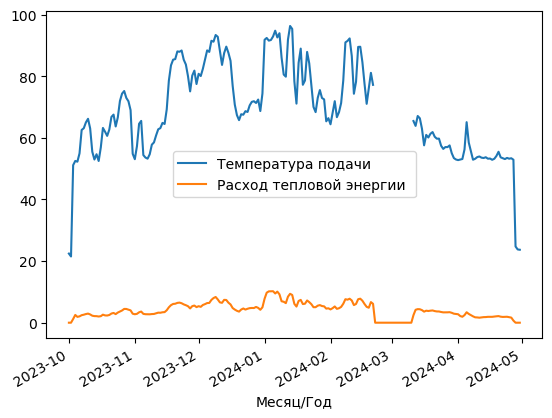

In [9]:
df_ASUPR[df_ASUPR['UNOM'] == 82024].plot(x='Месяц/Год', y=['Температура подачи', 'Расход тепловой энергии '])

In [10]:
df_ASUPR[df_ASUPR['UNOM'] == 82024][['Месяц/Год', 'Ошибки']]

,Месяц/Год,Ошибки
795745,2023-10-01,NaN
795746,2023-10-02,NaN
795747,2023-10-03,NaN
795748,2023-10-04,NaN
795749,2023-10-05,NaN
...,...,...
795946,2024-04-26,NaN
795947,2024-04-27,NaN
795948,2024-04-28,NaN
795949,2024-04-29,NaN


<Axes: xlabel='Месяц/Год'>

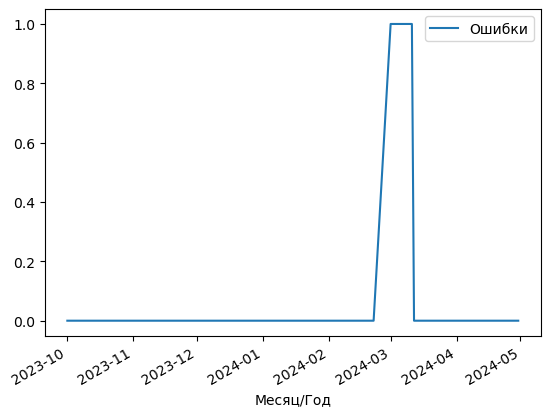

In [11]:
df_ASUPR[df_ASUPR['UNOM'] == 82024][['Месяц/Год', 'Ошибки']].groupby('Месяц/Год').count().plot()

<Axes: xlabel='Месяц/Год'>

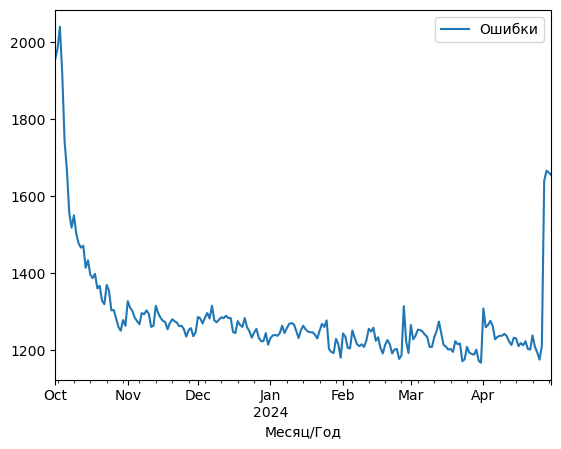

In [12]:
df_ASUPR[['Месяц/Год', 'Ошибки']].groupby('Месяц/Год').count().plot()

In [13]:
errors = list(df_ASUPR['Ошибки'].value_counts().index)
errors_UE = [err for err in errors if 'U' in err or 'E' in err]

In [14]:
df_ASUPR

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
0,309,2023-10-01,0.000000,0.000000,785496920,13.751,-0.250000,16.170000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",16.420000,0
1,309,2023-10-02,0.000000,0.000000,785496920,10.207,-0.420000,15.530000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",15.950000,0
2,309,2023-10-03,36.565113,0.131066,785496920,11.510,3.590000,34.660000,6.4,ЦО1,0.0,NaN,"D,E",-0.464314,"пос. Акулово, д. 9",31.070000,0
3,309,2023-10-04,129.014252,0.518789,785496920,13.787,4.030000,40.540000,24.0,ЦО1,0.0,NaN,NaN,-2.175583,"пос. Акулово, д. 9",36.510000,0
4,309,2023-10-05,115.018738,0.509342,785496920,10.278,4.440000,42.000000,24.0,ЦО1,0.0,NaN,NaN,-2.172752,"пос. Акулово, д. 9",37.560000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948499,9000117,2024-04-15,125.100586,0.830414,979972283,7.596,6.554344,40.970592,24.0,ЦО1,0.0,NaN,NaN,-0.506836,Солнечная ул. д. 3,34.416248,0
948500,9000117,2024-04-16,123.002930,0.855880,979972283,8.331,6.872722,41.358547,24.0,ЦО1,0.0,NaN,NaN,-0.505859,Солнечная ул. д. 3,34.485825,0
948501,9000117,2024-04-17,123.795898,0.828568,979972283,9.308,6.608257,41.004707,24.0,ЦО1,0.0,NaN,NaN,-0.503907,Солнечная ул. д. 3,34.396450,0
948502,9000117,2024-04-18,122.339844,0.888687,979972283,6.843,7.179848,41.857758,24.0,ЦО1,0.0,NaN,NaN,-0.514648,Солнечная ул. д. 3,34.677910,0


In [15]:
df_ASUPR[df_ASUPR['Месяц/Год'] == '2024-04-19']

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
201,309,2024-04-19,96.679832,0.464364,785496920,8.204,4.820000,41.290000,24.000000,ЦО1,0.0,NaN,NaN,-2.731667,"пос. Акулово, д. 9",36.470000,0
414,312,2024-04-19,290.556640,1.075775,785497014,8.204,3.709828,42.149502,24.000000,ЦО1,0.0,NaN,U,-9.285156,"пос. Акулово, д. 13",38.439674,0
596,314,2024-04-19,138.068359,1.076951,785497048,8.204,7.818512,41.944317,23.998291,ЦО1,0.0,NaN,NaN,-0.015626,"пос. Акулово, д. 15",34.125805,0
809,316,2024-04-19,184.712891,1.424896,785496973,8.204,7.732753,42.442760,24.000000,ЦО1,0.0,NaN,U,-0.205077,"пос. Акулово, д. 22",34.710007,0
1022,317,2024-04-19,669.242188,2.214477,785497040,8.204,3.313297,42.201500,23.994629,ЦО1,0.0,NaN,NaN,1.984376,"пос. Акулово, д. 24",38.888203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947705,9000112,2024-04-19,138.822266,0.818054,785497113,8.204,5.901634,42.256607,24.000000,ЦО1,0.0,NaN,NaN,2.479493,Лесная ул. д. 2,36.354973,0
947918,9000113,2024-04-19,123.070313,0.789352,44066,8.204,6.423897,42.290947,24.000000,ЦО1,0.0,NaN,U,-0.587891,Лесная ул. д. 3,35.867050,0
948128,9000114,2024-04-19,202.466797,1.094146,44071,8.204,5.416981,41.161583,23.998535,ЦО1,0.0,NaN,U,-4.359375,Молодежный пер. д. 2,35.744602,0
948290,9000116,2024-04-19,159.445312,0.863480,44073,8.204,5.429737,41.169849,23.999024,ЦО1,0.0,NaN,U,0.595703,Солнечная ул. д. 1,35.740112,0


In [16]:
len(df_ASUPR['UNOM'].unique())

4406

In [17]:
df_ASUPR[df_ASUPR['Количество жалоб'] >= 3]['UNOM'].value_counts()

UNOM
8381     50
15108    43
8358     36
19147    34
10014    33
         ..
19489     1
5750      1
19495     1
19496     1
18823     1
Name: count, Length: 2269, dtype: int64

In [18]:
df_ASUPR[df_ASUPR['Количество жалоб'] >= 3]['UNOM'].value_counts()

UNOM
8381     50
15108    43
8358     36
19147    34
10014    33
         ..
19489     1
5750      1
19495     1
19496     1
18823     1
Name: count, Length: 2269, dtype: int64

In [19]:
df_ASUPR[(~df_ASUPR['Ошибки'].isin(errors_UE)) & (df_ASUPR['Расход тепловой энергии '] == 0.) &
         (df_ASUPR['Наработка часов счётчика'] >= 23.9) & (df_ASUPR['Количество жалоб'] >= 1) &
         (df_ASUPR['temperature'] <= 10) & (df_ASUPR['Температура подачи'] >= 30)]

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
49464,2908,2023-10-08,0.000000,0.0,785494145,3.866,-0.264103,36.558952,24.000000,ЦО1,4.0,NaN,NaN,-0.042969,"пр-т Будённого, д. 19",36.823055,0
51168,2916,2023-10-08,0.000000,0.0,35854,3.866,7.916474,67.053406,24.000000,ЦО1,5.0,NaN,NaN,-0.011719,"пр-т Будённого, д. 23 (Ввод 2)",59.136932,0
51169,2916,2023-10-09,0.000000,0.0,35854,2.639,6.126587,69.436371,24.000000,ЦО1,10.0,NaN,NaN,-0.015625,"пр-т Будённого, д. 23 (Ввод 2)",63.309784,1
63031,3781,2023-10-09,0.000000,0.0,785498393,2.639,6.493648,45.965576,24.000000,ЦО1,1.0,NaN,NaN,0.000000,"Вешняковская ул., д. 5, к. 5",39.471928,1
63033,3781,2023-10-11,0.000000,0.0,785498393,3.203,10.364566,46.689655,24.000000,ЦО1,3.0,NaN,NaN,0.000000,"Вешняковская ул., д. 5, к. 5",36.325089,1
63034,3781,2023-10-12,0.000000,0.0,785498393,8.800,12.950668,57.752426,24.000000,ЦО1,1.0,NaN,NaN,0.000000,"Вешняковская ул., д. 5, к. 5",44.801758,1
71040,3976,2024-04-19,0.000000,0.0,5008,8.204,2.822151,37.694187,23.909485,ЦО1,1.0,NaN,NaN,0.000000,"1-я Владимирская ул., д. 4",34.872036,0
111008,5495,2023-10-08,0.000000,0.0,189741898,3.866,15.371815,34.226189,24.000000,ЦО1,7.0,NaN,NaN,0.000000,"Главная ул., д. 27",18.854374,0
111009,5495,2023-10-09,0.000000,0.0,189741898,2.639,17.298088,34.865433,24.000000,ЦО1,39.0,NaN,NaN,0.000000,"Главная ул., д. 27",17.567345,1
111010,5495,2023-10-10,0.000000,0.0,189741898,2.011,17.426911,37.708691,23.995606,ЦО1,33.0,NaN,D,0.000000,"Главная ул., д. 27",20.281780,1


In [20]:
df_ASUPR[(df_ASUPR['Температура подачи'] <= 30) & (df_ASUPR['Расход тепловой энергии '] > 0.)]

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
423,312,2024-04-28,0.250000,0.001343,785497014,10.917,5.459765,24.483372,24.000000,ЦО1,0.0,NaN,U,-0.101563,"пос. Акулово, д. 13",19.023607,0
1673,367,2023-10-01,7.054688,0.017395,162028154,13.751,2.461086,24.278988,24.000000,ЦО1,0.0,NaN,NaN,0.046875,"Алтайская ул., д. 7",21.817902,0
1674,367,2023-10-02,6.890625,0.016785,162028154,10.207,2.451572,23.981245,24.000000,ЦО1,0.0,NaN,NaN,0.078125,"Алтайская ул., д. 7",21.529673,0
1883,367,2024-04-28,4.398438,0.007019,162028154,10.917,1.605761,23.833584,23.999512,ЦО1,0.0,NaN,NaN,0.007813,"Алтайская ул., д. 7",22.227823,0
1884,367,2024-04-29,2.796875,0.004273,162028154,12.691,1.514425,23.242504,24.000000,ЦО1,0.0,NaN,NaN,-0.062500,"Алтайская ул., д. 7",21.728079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946440,4200119,2024-04-28,0.142090,0.000031,1000839,10.917,0.799423,20.286112,24.000000,ЦО1,0.0,NaN,g,-0.112793,"Оренбургская ул., д. 3А",19.486689,0
946441,4200119,2024-04-29,0.096679,0.000045,1000839,12.691,0.725271,17.900341,23.261474,ЦО1,0.0,NaN,g,-0.176270,"Оренбургская ул., д. 3А",17.175070,0
947038,4200267,2024-03-18,12750.826172,266.882843,150594819,2.321,0.000000,0.000000,3183.099121,ЦО1,0.0,NaN,U,-173.972656,"Новокосинская ул., д. 9А",0.000000,1
947934,9000114,2023-10-05,5.134000,0.081820,44071,10.278,2.775000,21.979167,4.480000,ЦО1,0.0,NaN,"D,g",0.337000,Молодежный пер. д. 2,19.204167,0


In [21]:
df_ASUPR[df_ASUPR['UNOM'] == 3976][(~df_ASUPR['Ошибки'].isin(errors_UE))]

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON
70839,3976,2023-10-01,0.000000,0.000000,5008,13.751,-2.055496,33.591770,0.000000,ЦО1,0.0,NaN,D,0.000000,"1-я Владимирская ул., д. 4",35.647266,0
70840,3976,2023-10-02,0.000000,0.000000,5008,10.207,-2.116150,33.219559,0.000000,ЦО1,0.0,NaN,D,0.000000,"1-я Владимирская ул., д. 4",35.335709,0
70841,3976,2023-10-03,0.000000,0.000000,5008,11.510,-2.216660,32.896137,0.000000,ЦО1,0.0,NaN,D,0.000000,"1-я Владимирская ул., д. 4",35.112797,0
70842,3976,2023-10-04,2.713269,0.001828,5008,13.787,0.389395,31.228178,0.272500,ЦО1,0.0,NaN,D,-0.004207,"1-я Владимирская ул., д. 4",30.838783,0
70843,3976,2023-10-05,4.643289,0.000000,5008,10.278,0.734754,22.726425,0.000000,ЦО1,0.0,NaN,D,-0.160506,"1-я Владимирская ул., д. 4",21.991671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71047,3976,2024-04-26,208.391419,2.130654,5008,16.610,10.276916,63.498470,23.947220,ЦО1,0.0,NaN,NaN,-0.552124,"1-я Владимирская ул., д. 4",53.221554,0
71048,3976,2024-04-27,96.747620,0.985166,5008,12.441,10.249470,62.313751,23.926659,ЦО1,0.0,NaN,NaN,-0.357299,"1-я Владимирская ул., д. 4",52.064281,0
71049,3976,2024-04-28,4.384887,0.001813,5008,10.917,0.489495,26.172152,23.914993,ЦО1,0.0,NaN,NaN,-0.173219,"1-я Владимирская ул., д. 4",25.682657,0
71050,3976,2024-04-29,0.605498,0.000174,5008,12.691,0.230245,26.220186,15.929166,ЦО1,0.0,NaN,NaN,0.138606,"1-я Владимирская ул., д. 4",25.989941,0


## Читаем данные о расположении домов

In [22]:
df_coard = pd.read_excel('data/13. Адресный реестр объектов недвижимости города Москвы.xlsx')
df_coard = df_coard.drop(0)
df_coard = df_coard[['UNOM', 'geodata_center']]
df_coard['UNOM'] = df_coard['UNOM'].astype('int')
df_coard = df_coard.dropna()

def get_coard(row):
    longitude, latitude = row['geodata_center'].split('[')[1].split(']')[0].split(', ')
    row['longitude'] = float(longitude)
    row['latitude'] = float(latitude)
    return row
 
df_coard = df_coard.apply(get_coard, axis=1).drop('geodata_center', axis=1)
df_coard

,UNOM,longitude,latitude
1,2102436,37.828189,55.717483
2,5783,37.668013,55.766228
3,2133081,37.513482,55.803579
4,2128644,37.797664,55.720046
5,3400130,37.514883,55.815345
...,...,...,...
491336,6500196,37.472731,55.721942
491337,6514678,37.505747,55.880468
491338,6514682,37.506331,55.880750
491339,6500029,37.632316,55.806756


## Читаем и обьединяем данные о домах и ТП снобжающих их теплом

In [23]:
df = pd.read_excel('data/14. ВАО_Многоквартирные_дома_с_технико_экономическими_характеристиками.xlsx')
df = df.drop(0)

col_769 = pd.read_excel('data/14. ВАО_Многоквартирные_дома_с_технико_экономическими_характеристиками.xlsx', sheet_name='COL_769')
col_769 = col_769.drop(0)
col_770 = pd.read_excel('data/14. ВАО_Многоквартирные_дома_с_технико_экономическими_характеристиками.xlsx', sheet_name='COL_770')
col_770 = col_770.drop(0)
col_758 = pd.read_excel('data/14. ВАО_Многоквартирные_дома_с_технико_экономическими_характеристиками.xlsx', sheet_name='COL_758')
col_758 = col_758.drop(0)

df['col_770'] = df['col_770'].replace(col_770['Объекты модели - Признак аварийности здания (1182)'].values, col_770['Unnamed: 1'].values)
df['col_769'] = df['col_769'].replace(col_769['Объекты модели - Материалы стен (305)'].values, col_769['Unnamed: 1'].values)
df['col_758'] = df['col_758'].replace(col_758['Объекты модели - Серии проектов (323)'].values, col_758['Unnamed: 1'].values)

df = df[['unom', 'address', 'col_758', 'col_769', 'col_761', 'col_766', 'col_762', 'col_770']]
df = df.rename(columns={'col_758': 'Серии проэктов', 'col_769': 'Стены', 'col_761': 'Квартиры', 'col_766': 'Износ', 'col_762': 'Площадь', 'col_770': 'Аварийность'})
df['Площадь'] = df['Площадь'].astype('float')
df['Квартиры'] = df['Квартиры'].astype('float')
df['Износ'] = df['Износ'].fillna(-1).astype('int')

df_join_adress = pd.read_excel('service/crossaddress_odpu-moek.xlsx')
df_moek = pd.read_excel('data/7. Схема подключений МОЭК.xlsx')
df_moek['Адрес строения'] = df_moek['Адрес строения'].replace(df_join_adress['address2'].values, df_join_adress['address1'].values)
df_moek = df_moek[['Адрес строения', 'Вид ТП', 'Источник теплоснабжения', 'Тип по размещению', 'Номер ТП']]
df_moek = df_moek.merge(df_ASUPR[['UNOM', 'Адрес']], left_on='Адрес строения', right_on='Адрес', how='left').drop(columns=['Адрес строения'])
df = df.merge(df_moek, left_on='unom', right_on='UNOM', how='left').drop(columns=['Адрес', 'UNOM'])

df_iznos = pd.read_excel('service/серии домов и износ.xlsx')
df = df.merge(df_iznos.drop(columns=['alter_address', 'alter_unom']), on='unom', how='left')
df = df.drop_duplicates()
df = df.drop(columns=['Серии проэктов', 'lat', 'lon', 'Площадь', 'total_living_area', 'total_nliving_area', 'Квартиры'])

df['old'] = 2024 - df['year_of_building']
df = df.drop(columns=['year_of_building', 'address', 'Износ', 'Аварийность'])

df

,unom,Стены,Вид ТП,Источник теплоснабжения,Тип по размещению,Номер ТП,predict_serie,total_area,predict_wear,old
0,31783,панельные,ЦТП,РТС Перово,Встроенное,04-09-213,П-55,9212.6,24.19,32.0
213,24231,из железобетонных сегментов,ЦТП,ТЭЦ №23,Отдельно стоящий,04-02-0608/029,1-510,2806.9,50.04,62.0
426,16560,панельные,ЦТП,РТС Перово,Отдельно стоящий,04-09-505,NaN,NaN,NaN,NaN
639,12180,железобетонные,NaN,NaN,NaN,NaN,II-68,11503.9,34.07,45.0
640,18617,кирпичные,NaN,NaN,NaN,NaN,1-511,9141.4,41.48,64.0
...,...,...,...,...,...,...,...,...,...,...
592276,65025,кирпичные,ИТП,ТЭЦ №11,Подвальное,04-02-0420/045,1-511,2973.4,41.48,64.0
592489,19224,кирпичные,ЦТП,ТЭЦ №23,Отдельно стоящий,04-07-0601/098,1-511,6042.1,41.48,67.0
592691,65101,монолитные (ж-б),NaN,NaN,NaN,NaN,ПД-4,12627.8,15.03,22.0
592692,26819,кирпичные,NaN,NaN,NaN,NaN,Башня Вулыха,5464.1,41.79,55.0


## Вычисляем температур подачи и обратки от нормативных

In [24]:
def interpolate_graph(graph, temp):
    # Интерполяция линейным способом
    return np.interp(temp, [x[0] for x in graph], [x[1] for x in graph])

def determine_graph(df_address):
    min_rmse = float('inf')
    best_graph = None
    best_mae = None
    best_r2 = None

    for graph_name, graph in temp_graphs.items():
        # Интерполяция температурных графиков для всех температур наружного воздуха
        predicted_supply = interpolate_graph(graph['подающий'], df_address['temperature'])
        predicted_return = interpolate_graph(graph['обратный'], df_address['temperature'])

        # Вычисление среднеквадратичной ошибки для подающего и обратного трубопроводов
        rmse_supply = mean_squared_error(df_address['Температура подачи'], predicted_supply, squared=False)
        rmse_return = mean_squared_error(df_address['Температура обратки'], predicted_return, squared=False)

        # Вычисление средней абсолютной ошибки для подающего и обратного трубопроводов
        mae_supply = mean_absolute_error(df_address['Температура подачи'], predicted_supply)
        mae_return = mean_absolute_error(df_address['Температура обратки'], predicted_return)

        # Вычисление R-квадрата для подающего и обратного трубопроводов
        r2_supply = r2_score(df_address['Температура подачи'], predicted_supply)
        r2_return = r2_score(df_address['Температура обратки'], predicted_return)

        # Суммируем ошибки для подающего и обратного трубопроводов
        total_rmse = rmse_supply + rmse_return
        total_mae = mae_supply + mae_return
        avg_r2 = (r2_supply + r2_return) / 2

        # Определяем график с наименьшей ошибкой
        if total_rmse < min_rmse:
            min_rmse = total_rmse
            best_graph = graph_name
            best_mae = total_mae / 2  # Среднее значение MAE для подающего и обратного трубопроводов
            best_r2 = avg_r2  # Среднее значение R-квадрата для подающего и обратного трубопроводов

    return best_graph, min_rmse, best_mae, best_r2

# Получение уникальных адресов
ddf = df_ASUPR[['ID УУ', 'temperature', 'Месяц/Год', 'Температура подачи', 'Температура обратки']].dropna().copy()
addresses = ddf['ID УУ'].unique()

graph_results = []

# Итерация по адресам
for address in tqdm(addresses):
    df_address = ddf[ddf['ID УУ'] == address]
    graph_result, min_rmse, best_mae, best_r2 = determine_graph(df_address)
    graph_results.append((address, graph_result, min_rmse, best_mae, best_r2))

result_df = pd.DataFrame(graph_results, columns=['ID УУ', 'Температурный график', 'RMSE', 'MAE', 'R-квадрат'])

df_ASUPR = df_ASUPR.merge(result_df[['ID УУ', 'Температурный график']], left_on='ID УУ', right_on='ID УУ', how='left')

df_ASUPR

  0%|          | 0/4414 [00:00<?, ?it/s]

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),Количество жалоб,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график
0,309,2023-10-01,0.000000,0.000000,785496920,13.751,-0.250000,16.170000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",16.420000,0,95-70
1,309,2023-10-02,0.000000,0.000000,785496920,10.207,-0.420000,15.530000,0.0,ЦО1,0.0,NaN,"D,E",0.000000,"пос. Акулово, д. 9",15.950000,0,95-70
2,309,2023-10-03,36.565113,0.131066,785496920,11.510,3.590000,34.660000,6.4,ЦО1,0.0,NaN,"D,E",-0.464314,"пос. Акулово, д. 9",31.070000,0,95-70
3,309,2023-10-04,129.014252,0.518789,785496920,13.787,4.030000,40.540000,24.0,ЦО1,0.0,NaN,NaN,-2.175583,"пос. Акулово, д. 9",36.510000,0,95-70
4,309,2023-10-05,115.018738,0.509342,785496920,10.278,4.440000,42.000000,24.0,ЦО1,0.0,NaN,NaN,-2.172752,"пос. Акулово, д. 9",37.560000,0,95-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923145,9000117,2024-04-15,125.100586,0.830414,979972283,7.596,6.554344,40.970592,24.0,ЦО1,0.0,NaN,NaN,-0.506836,Солнечная ул. д. 3,34.416248,0,95-70
923146,9000117,2024-04-16,123.002930,0.855880,979972283,8.331,6.872722,41.358547,24.0,ЦО1,0.0,NaN,NaN,-0.505859,Солнечная ул. д. 3,34.485825,0,95-70
923147,9000117,2024-04-17,123.795898,0.828568,979972283,9.308,6.608257,41.004707,24.0,ЦО1,0.0,NaN,NaN,-0.503907,Солнечная ул. д. 3,34.396450,0,95-70
923148,9000117,2024-04-18,122.339844,0.888687,979972283,6.843,7.179848,41.857758,24.0,ЦО1,0.0,NaN,NaN,-0.514648,Солнечная ул. д. 3,34.677910,0,95-70


In [25]:
def prosentage_temp_delta(row):
    try:
        graff = row['Температурный график']
        T1 = row['Температура подачи']
        T2 = row['Температура обратки']
        T = row['temperature']
        T1_ = interpolate_graph(temp_graphs[graff]['подающий'], T)
        T2_ = interpolate_graph(temp_graphs[graff]['обратный'], T)
        if row['ON'] == 1:
            dT1 = abs(T1 - T1_) / abs(T1)
            if T2 > T2_:
                dT2 = abs(T2 - T2_) / abs(T2)
            else:
                dT2 = 0
        else:
            dT1 = 0
            dT2 = 0
        if dT1 > 0.03:    
            ERR1 = dT1 - 0.03
        else:
            ERR1 = 0
        if dT2 > 0.05:
            ERR2 = dT2 - 0.05
        else:
            ERR2 = 0
        row['ERR1'] = ERR1
        row['ERR2'] = ERR2
    except:
        row['ERR1'] = np.NAN
        row['ERR2'] = np.NAN
    return row

df_ASUPR = df_ASUPR.parallel_apply(prosentage_temp_delta, axis=1)
df_ASUPR['ERR'] = (df_ASUPR['ERR1'] + df_ASUPR['ERR2']) / 2

df_ASUPR

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR
0,309,2023-10-01,0.000000,0.000000,785496920,13.751,-0.250000,16.170000,0.0,ЦО1,...,NaN,"D,E",0.000000,"пос. Акулово, д. 9",16.420000,0,95-70,0.0,0.0,0.0
1,309,2023-10-02,0.000000,0.000000,785496920,10.207,-0.420000,15.530000,0.0,ЦО1,...,NaN,"D,E",0.000000,"пос. Акулово, д. 9",15.950000,0,95-70,0.0,0.0,0.0
2,309,2023-10-03,36.565113,0.131066,785496920,11.510,3.590000,34.660000,6.4,ЦО1,...,NaN,"D,E",-0.464314,"пос. Акулово, д. 9",31.070000,0,95-70,0.0,0.0,0.0
3,309,2023-10-04,129.014252,0.518789,785496920,13.787,4.030000,40.540000,24.0,ЦО1,...,NaN,NaN,-2.175583,"пос. Акулово, д. 9",36.510000,0,95-70,0.0,0.0,0.0
4,309,2023-10-05,115.018738,0.509342,785496920,10.278,4.440000,42.000000,24.0,ЦО1,...,NaN,NaN,-2.172752,"пос. Акулово, д. 9",37.560000,0,95-70,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923145,9000117,2024-04-15,125.100586,0.830414,979972283,7.596,6.554344,40.970592,24.0,ЦО1,...,NaN,NaN,-0.506836,Солнечная ул. д. 3,34.416248,0,95-70,0.0,0.0,0.0
923146,9000117,2024-04-16,123.002930,0.855880,979972283,8.331,6.872722,41.358547,24.0,ЦО1,...,NaN,NaN,-0.505859,Солнечная ул. д. 3,34.485825,0,95-70,0.0,0.0,0.0
923147,9000117,2024-04-17,123.795898,0.828568,979972283,9.308,6.608257,41.004707,24.0,ЦО1,...,NaN,NaN,-0.503907,Солнечная ул. д. 3,34.396450,0,95-70,0.0,0.0,0.0
923148,9000117,2024-04-18,122.339844,0.888687,979972283,6.843,7.179848,41.857758,24.0,ЦО1,...,NaN,NaN,-0.514648,Солнечная ул. д. 3,34.677910,0,95-70,0.0,0.0,0.0


## Исследование информации полученной от приборов учета

In [26]:
df_0 = df_ASUPR[(df_ASUPR['ON'] == 1) & (~df_ASUPR['Ошибки'].isin(errors_UE)) & (df_ASUPR['Наработка часов счётчика'] >= 23.9) 
                & (df_ASUPR['Температура подачи'] != 0) & (df_ASUPR['Объём поданого теплоносителя в систему ЦО'] <= 10)]
df_0

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Отключение,Ошибки,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR
9252,541,2023-10-09,2.475586,0.083313,193954217,2.639,33.630161,80.341728,24.000000,ЦО1,...,NaN,NaN,-47.668945,"Амурская ул., д. 28",46.711567,1,150-70,0.010561,0.000000,0.005280
51169,2916,2023-10-09,0.000000,0.000000,35854,2.639,6.126587,69.436371,24.000000,ЦО1,...,NaN,NaN,-0.015625,"пр-т Будённого, д. 23 (Ввод 2)",63.309784,1,*150-70,0.118130,0.191823,0.154977
58336,2997,2024-03-23,0.000000,0.000000,343677892,2.875,34.016403,76.853958,24.000000,ЦО1,...,NaN,NaN,0.000000,"Буракова ул., д. 7, к. 2",42.837555,1,150-70,0.000000,0.000000,0.000000
58337,2997,2024-03-24,0.000000,0.000000,343677892,3.626,32.428306,74.067352,24.000000,ЦО1,...,NaN,NaN,0.000000,"Буракова ул., д. 7, к. 2",41.639046,1,150-70,0.000000,0.000000,0.000000
58338,2997,2024-03-25,0.000000,0.000000,343677892,3.643,32.689328,74.259560,24.000000,ЦО1,...,NaN,NaN,0.000000,"Буракова ул., д. 7, к. 2",41.570232,1,150-70,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916618,2504005,2024-01-16,0.000000,0.000000,174684537,-2.256,8.130000,60.750000,24.000000,ЦО1,...,NaN,NaN,0.000000,"Вольная ул., д. 5Б",52.620000,1,95-70,0.000000,0.013930,0.006965
916619,2504005,2024-01-17,0.000000,0.000000,174684537,-9.628,11.330000,69.930000,24.000000,ЦО1,...,NaN,NaN,0.000000,"Вольная ул., д. 5Б",58.600000,1,95-70,0.000000,0.000000,0.000000
918702,2600970,2024-01-31,0.000000,1.616433,182756191,-0.842,NaN,NaN,24.000000,ЦО1,...,NaN,NaN,0.000000,"Лухмановская ул., д. 31",NaN,1,95-70,0.000000,0.000000,0.000000
918932,2601125,2024-04-09,0.000000,0.000000,596248,13.506,NaN,NaN,24.000000,ЦО2,...,NaN,NaN,0.000000,"Ткацкая ул., д. 24",NaN,1,NaN,NaN,NaN,NaN


In [27]:
df_ASUPR[df_ASUPR['Отключение'] == 1].UNOM.unique()

array([   1258,    1259,    1260,    2325,    2933,    2936,    5927,
          5928,    5929,    5930,    7380,   12174,   13101,   13102,
         13103,   13104,   13634,   13635,   13636,   13638,   13640,
         13641,   14599,   16875,   16876,   16877,   16883,   16885,
         16886,   17985,   17989,   17990,   18037,   18038,   18039,
         18040,   18041,   18042,   18043,   18044,   18045,   18046,
         18047,   18142,   18152,   18153,   18154,   18155,   18156,
         18157,   18186,   18187,   18188,   18189,   18190,   18191,
         18192,   18193,   18227,   18228,   19175,   20901,   20906,
         22290,   24147,   24230,   24231,   24232,   24233,   28393,
         28394,   28395,   28396,   28397,   28399,   28400,   28403,
         28404,   28405,   28406,   28407,   28620,   29916,   29917,
         29918,   29919,   64014,   64029, 2104132, 2109318, 2109319,
       2114437, 2114448, 2116345, 2404752])

In [28]:
df_ASUPR_good = df_ASUPR[(~df_ASUPR['Ошибки'].isin(errors_UE)) & (df_ASUPR['Наработка часов счётчика'] >= 23.9) & (df_ASUPR['Температура подачи'] != 0) & (df_ASUPR['ON'] == 1)]
df_ASUPR_good = df_ASUPR_good.merge(df[['unom', 'Номер ТП']], left_on='UNOM', right_on='unom', how='left').drop(columns=['unom'])
df_ASUPR_good['target'] = (df_ASUPR_good['Объём поданого теплоносителя в систему ЦО'] <= 10).astype('int')
df_ASUPR_good

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR,Номер ТП,target
0,309,2023-10-09,102.145340,0.780699,785496920,2.639,7.640000,50.750000,24.0,ЦО1,...,-1.944336,"пос. Акулово, д. 9",43.110000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
1,309,2023-10-10,103.091225,0.798714,785496920,2.011,7.750000,51.600000,24.0,ЦО1,...,-2.010070,"пос. Акулово, д. 9",43.850000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
2,309,2023-10-11,102.676529,0.737768,785496920,3.203,7.190000,49.940000,24.0,ЦО1,...,-1.994743,"пос. Акулово, д. 9",42.750000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
3,309,2023-10-12,99.529190,0.638450,785496920,8.800,6.410000,46.910000,24.0,ЦО1,...,-1.877495,"пос. Акулово, д. 9",40.500000,1,95-70,0.095986,0.011728,0.053857,03-09-315,0
4,309,2023-10-13,99.870842,0.660073,785496920,9.391,6.620000,48.050000,24.0,ЦО1,...,-1.960442,"пос. Акулово, д. 9",41.430000,1,95-70,0.116722,0.032790,0.074756,03-09-315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606903,9000117,2024-03-30,124.107422,1.202744,979972283,8.188,9.608833,48.268974,24.0,ЦО1,...,-0.471680,Солнечная ул. д. 3,38.660141,1,95-70,0.120593,0.000000,0.060297,NaN,0
606904,9000117,2024-03-31,124.396484,1.141647,979972283,10.014,9.094631,47.687382,24.0,ЦО1,...,-0.466797,Солнечная ул. д. 3,38.592751,1,95-70,0.110234,0.000000,0.055117,NaN,0
606905,9000117,2024-04-01,124.819336,1.101090,979972283,14.325,8.738277,47.728916,24.0,ЦО1,...,-0.460937,Солнечная ул. д. 3,38.990639,1,95-70,0.110982,0.000000,0.055491,NaN,0
606906,9000117,2024-04-09,123.094727,0.786575,979972283,13.506,6.305580,41.158848,24.0,ЦО1,...,-0.488281,Солнечная ул. д. 3,34.853268,1,95-70,0.000000,0.000000,0.000000,NaN,0


In [29]:
df_ASUPR_good.sort_values(by='ERR1', ascending=False)

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR,Номер ТП,target
373905,23735,2023-10-27,586.633302,1.195510,785480038,-1.851,3.548251,1.169490,23.999444,ЦО1,...,-0.055032,"Измайловский б-р, д. 9",-2.378761,1,95-70,49.164529,0.0,24.582265,04-05-0604/143,0
373908,23735,2023-10-30,585.426314,1.058425,785480038,0.889,3.240286,2.058332,23.999723,ЦО1,...,-0.474137,"Измайловский б-р, д. 9",-1.181954,1,95-70,25.258762,0.0,12.629381,04-05-0604/143,0
373903,23735,2023-10-25,587.147657,1.327028,785480038,-0.894,3.578258,2.356611,23.999722,ЦО1,...,0.269572,"Измайловский б-р, д. 9",-1.221647,1,95-70,23.067316,0.0,11.533658,04-05-0604/143,0
565860,2121802,2024-01-04,0.000000,0.000000,1944419802,-25.009,1.005620,5.643913,24.000000,ЦО1,...,0.000000,"Мартеновская ул., д. 3А",4.638293,1,95-70,15.626706,0.0,7.813353,NaN,1
565859,2121802,2024-01-03,0.000000,0.000000,1944419802,-23.791,0.881506,6.406994,24.000000,ЦО1,...,0.000000,"Мартеновская ул., д. 3А",5.525488,1,95-70,13.452767,0.0,6.726383,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298002,19262,2024-03-09,40.821045,2.096344,785477337,-3.620,51.304134,94.592865,24.000000,ЦО1,...,-0.203613,"6-я Парковая ул., д. 12",43.288731,1,150-70,0.000000,0.0,0.000000,04-05-0604/094,0
298001,19262,2024-03-08,41.768799,2.139053,785477337,-3.694,51.160198,94.898552,24.000000,ЦО1,...,-0.225097,"6-я Парковая ул., д. 12",43.738354,1,150-70,0.000000,0.0,0.000000,04-05-0604/094,0
606907,9000117,2024-04-10,124.631836,0.817185,979972283,14.086,6.472363,41.847279,24.000000,ЦО1,...,-0.470703,Солнечная ул. д. 3,35.374916,1,95-70,0.000000,0.0,0.000000,NaN,0
604298,2601125,2024-04-09,0.000000,0.000000,596248,13.506,NaN,NaN,24.000000,ЦО2,...,0.000000,"Ткацкая ул., д. 24",NaN,1,NaN,NaN,NaN,NaN,NaN,1


In [30]:
df_ASUPR_good[df_ASUPR_good['Номер ТП'] == '04-05-0604/143']

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR,Номер ТП,target
238360,18590,2023-10-09,338.116522,2.512588,785476053,2.639,7.395905,46.357361,23.999722,ЦО1,...,-1.937211,"5-я Парковая ул., д. 33",38.961456,1,95-70,0.064152,0.000000,0.032076,04-05-0604/143,0
238361,18590,2023-10-10,337.656875,2.602574,785476053,2.011,7.669785,46.975773,23.999722,ЦО1,...,-2.344220,"5-я Парковая ул., д. 33",39.305988,1,95-70,0.076485,0.000000,0.038243,04-05-0604/143,0
238362,18590,2023-10-11,337.546089,2.721871,785476053,3.203,8.030983,47.878162,23.999722,ЦО1,...,-2.397541,"5-я Парковая ул., д. 33",39.847179,1,95-70,0.005838,0.000000,0.002919,04-05-0604/143,0
238363,18590,2023-10-12,337.365686,2.853834,785476053,8.800,8.428254,49.506001,23.999722,ЦО1,...,-2.427207,"5-я Парковая ул., д. 33",41.077747,1,95-70,0.141818,0.024925,0.083371,04-05-0604/143,0
238364,18590,2023-10-13,337.470892,3.192136,785476053,9.391,9.418720,53.346939,23.999723,ЦО1,...,-2.787170,"5-я Парковая ул., д. 33",43.928219,1,95-70,0.201446,0.084952,0.143199,04-05-0604/143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374055,23735,2024-03-30,415.977002,1.224457,785480038,8.188,2.929199,48.306183,23.999722,ЦО1,...,-0.654854,"Измайловский б-р, д. 9",45.376984,1,95-70,0.121247,0.112571,0.116909,04-05-0604/143,0
374056,23735,2024-03-31,584.418060,1.675950,785480038,10.014,2.854110,48.305019,23.999722,ЦО1,...,-0.920806,"Измайловский б-р, д. 9",45.450909,1,95-70,0.121227,0.113933,0.117580,04-05-0604/143,0
374057,23735,2024-04-01,584.671869,1.655729,785480038,14.325,2.819374,49.023540,23.999723,ЦО1,...,-0.821691,"Измайловский б-р, д. 9",46.204166,1,95-70,0.133667,0.127563,0.130615,04-05-0604/143,0
374058,23735,2024-04-09,584.047080,1.648735,785480038,13.506,2.809887,49.025623,23.999722,ЦО1,...,-0.850784,"Измайловский б-р, д. 9",46.215736,1,95-70,0.133703,0.127769,0.130736,04-05-0604/143,0


In [31]:
df_ASUPR_good.groupby('UNOM').agg({'ERR':'sum'}).sort_values(by='ERR', ascending=False).head(200)

,ERR
UNOM,
2121802,477.559558
23735,74.407166
6314,49.851933
2121769,45.867905
2116174,33.136080
...,...
80014,14.569110
30018,14.527723
2116233,14.490559


In [32]:
unoms = df_ASUPR_good.UNOM.sample(100)

<Axes: xlabel='Месяц/Год', ylabel='ERR'>

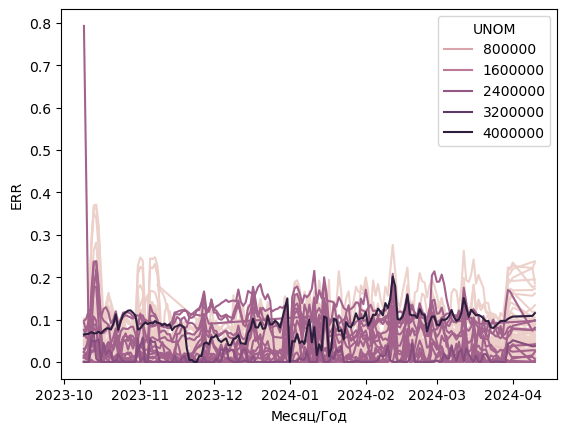

In [33]:
sns.lineplot(data=df_ASUPR_good[df_ASUPR_good['UNOM'].isin(unoms)], x='Месяц/Год', y='ERR', hue='UNOM')

<Axes: xlabel='Месяц/Год'>

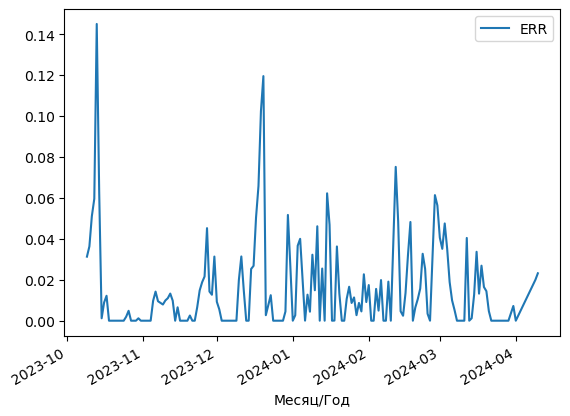

In [34]:
df_ASUPR_good[df_ASUPR_good['UNOM'] == 2114456].plot(x='Месяц/Год', y='ERR')

<Axes: xlabel='Месяц/Год'>

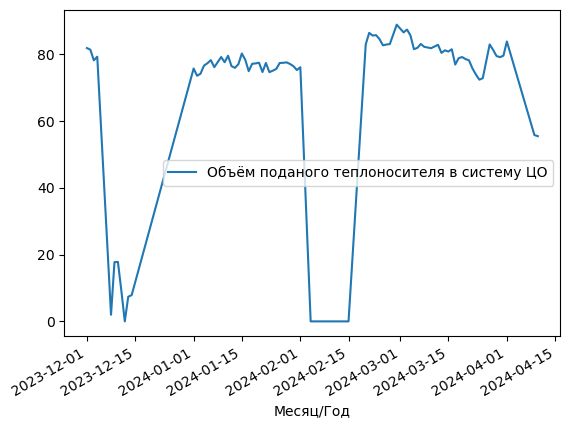

In [35]:
df_ASUPR_good[df_ASUPR_good['UNOM'] == 2109228].plot(x='Месяц/Год', y='Объём поданого теплоносителя в систему ЦО')

<Axes: xlabel='Месяц/Год'>

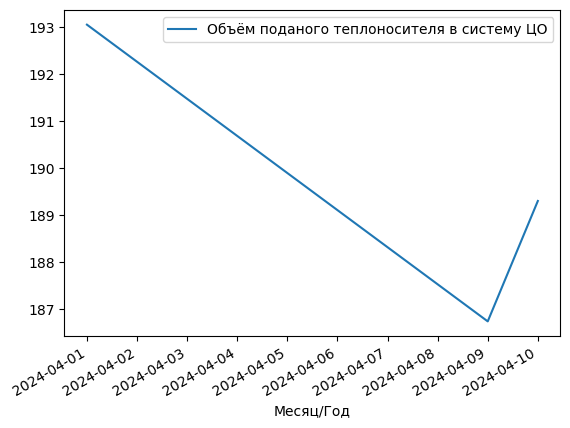

In [36]:
df_ASUPR_good[df_ASUPR_good['UNOM'] == 24044].plot(x='Месяц/Год', y='Объём поданого теплоносителя в систему ЦО')

## Формирование датасата путем разбиения данных на 2 временных промежутка и агрегации ранее собранных данных для каждого дома

Таргетом будет являться наличие аварийного события для дома в 2 периеде, в качестве фичей взяты агрегированные данные о доме и данные с приборов учета.

In [37]:
dates = sorted(df_ASUPR['Месяц/Год'].unique())
per1, per2 = dates[0: int(len(dates) / 3)], dates[int(len(dates) / 3):]

df1 = df_ASUPR_good[df_ASUPR_good['Месяц/Год'].isin(per1)]
df2 = df_ASUPR_good[df_ASUPR_good['Месяц/Год'].isin(per2)]

df1

,UNOM,Месяц/Год,Объём поданого теплоносителя в систему ЦО,Расход тепловой энергии,ID УУ,temperature,dT,Температура подачи,Наработка часов счётчика,Центральное отопление(контур),...,Подмес/Утечка,Адрес,Температура обратки,ON,Температурный график,ERR1,ERR2,ERR,Номер ТП,target
0,309,2023-10-09,102.145340,0.780699,785496920,2.639,7.640000,50.750000,24.0,ЦО1,...,-1.944336,"пос. Акулово, д. 9",43.110000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
1,309,2023-10-10,103.091225,0.798714,785496920,2.011,7.750000,51.600000,24.0,ЦО1,...,-2.010070,"пос. Акулово, д. 9",43.850000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
2,309,2023-10-11,102.676529,0.737768,785496920,3.203,7.190000,49.940000,24.0,ЦО1,...,-1.994743,"пос. Акулово, д. 9",42.750000,1,95-70,0.000000,0.000000,0.000000,03-09-315,0
3,309,2023-10-12,99.529190,0.638450,785496920,8.800,6.410000,46.910000,24.0,ЦО1,...,-1.877495,"пос. Акулово, д. 9",40.500000,1,95-70,0.095986,0.011728,0.053857,03-09-315,0
4,309,2023-10-13,99.870842,0.660073,785496920,9.391,6.620000,48.050000,24.0,ЦО1,...,-1.960442,"пос. Акулово, д. 9",41.430000,1,95-70,0.116722,0.032790,0.074756,03-09-315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606790,9000117,2023-12-06,124.949219,2.296936,979972283,-10.903,18.300972,66.243759,24.0,ЦО1,...,0.640625,Солнечная ул. д. 3,47.942787,1,95-70,0.084158,0.000000,0.042079,NaN,0
606791,9000117,2023-12-07,124.294921,2.368774,979972283,-11.243,18.974782,67.576653,24.0,ЦО1,...,0.644530,Солнечная ул. д. 3,48.601871,1,95-70,0.068649,0.000000,0.034324,NaN,0
606792,9000117,2023-12-08,123.386719,2.487427,979972283,-13.112,20.075348,69.689636,24.0,ЦО1,...,0.630860,Солнечная ул. д. 3,49.614288,1,95-70,0.076506,0.000000,0.038253,NaN,0
606793,9000117,2023-12-09,124.648438,2.599884,979972283,-14.353,20.772324,71.298241,24.0,ЦО1,...,0.642579,Солнечная ул. д. 3,50.525917,1,95-70,0.073898,0.000000,0.036949,NaN,0


In [38]:
df1['Номер ТП'][df1['target'] == 1].value_counts()

Номер ТП
04-05-0604/064       36
04-05-0602/075       27
04-03-0223/013       19
04-06-0601/002       18
04-05-0604/122       17
04-02-0409/040       12
04-05-0604/179        8
04-04-0601/130        8
04-04-0224/017        7
04-04-0212/023        7
04-02-0422/047        6
04-03-0223/044        4
04-06-0603/042        4
05-07-0209/191        4
04-03-0221/030        3
04-05-0604/108        2
04-07-0604/053        2
04-05-0604/025-5      2
04-02-0422/078        2
04-06-0601/031        1
04-03-0221/044        1
04-05-0604/104        1
04-04-0224/008-01     1
04-02-0608/083        1
04-03-0408/006        1
04-03-0221/032        1
04-06-0601/105-1      1
04-06-0603/029        1
04-06-0603/003        1
04-05-0602/027        1
04-02-0409/034        1
04-05-0602/083        1
04-04-0224/006        1
04-02-0608/020        1
04-04-0212/010        1
04-05-0602/077        1
04-05-0602/008        1
04-07-0223/036        1
04-03-0209/029        1
04-05-0604/105        1
Name: count, dtype: int64

In [39]:
df1['Центральное отопление(контур)'][df1['target'] == 1].value_counts()

Центральное отопление(контур)
ЦО1    597
ТЭ1     10
Name: count, dtype: int64

In [40]:
df1_x = df1[df1['target'] == 0]
df2_x = df2[df2['target'] == 0]

df1_agg_y = df1.groupby('UNOM').agg({'target': 'max'}).reset_index()
df2_agg_y = df2.groupby('UNOM').agg({'target': 'max'}).reset_index()

df1_agg = df1_x.groupby('UNOM').agg({'Объём поданого теплоносителя в систему ЦО':['mean', 'std', 'median'],
                         'Расход тепловой энергии ': ['mean', 'std', 'median'],
                         'temperature': 'mean',
                         'Центральное отопление(контур)': 'min',
                         'Количество жалоб': 'mean',
                         'Подмес/Утечка': ['mean', 'std'],
                         'ERR': ['mean', 'std'],
                         'ERR1': ['mean', 'std'],
                         'ERR2': ['mean', 'std'],
                         'Номер ТП': 'min',
                         'target': 'max'
                         }).reset_index()

df2_agg = df2_x.groupby('UNOM').agg({'Объём поданого теплоносителя в систему ЦО':['mean', 'std', 'median'],
                         'Расход тепловой энергии ': ['mean', 'std', 'median'],
                         'temperature': 'mean',
                         'Центральное отопление(контур)': 'min',
                         'Количество жалоб': 'mean',
                         'Подмес/Утечка': ['mean', 'std'],
                         'ERR': ['mean', 'std'],
                         'ERR1': ['mean', 'std'],
                         'ERR2': ['mean', 'std'],
                         'Номер ТП': 'min',
                         'target': 'max'
                         }).reset_index()

df1_agg.columns = list(map(lambda x: x[0] + '_' + x[1], df1_agg.columns))
df2_agg.columns = list(map(lambda x: x[0] + '_' + x[1], df2_agg.columns))

df1_agg

,UNOM_,Объём поданого теплоносителя в систему ЦО_mean,Объём поданого теплоносителя в систему ЦО_std,Объём поданого теплоносителя в систему ЦО_median,Расход тепловой энергии _mean,Расход тепловой энергии _std,Расход тепловой энергии _median,temperature_mean,Центральное отопление(контур)_min,Количество жалоб_mean,Подмес/Утечка_mean,Подмес/Утечка_std,ERR_mean,ERR_std,ERR1_mean,ERR1_std,ERR2_mean,ERR2_std,Номер ТП_min,target_max
0,309,97.636941,2.692816,97.587463,0.886866,0.291260,0.843859,-0.063587,ЦО1,0.000000,-2.113292,0.086090,0.012291,0.019090,0.023313,0.034853,0.001268,0.005294,03-09-315,0
1,314,137.230933,2.169395,137.417237,2.135417,0.680325,2.355549,-2.130700,ЦО1,0.025000,0.382727,0.207492,0.007606,0.012952,0.015213,0.025904,0.000000,0.000000,03-09-315,0
2,316,183.142981,2.644651,183.662110,2.464984,0.779934,2.276001,-0.063587,ЦО1,0.031746,0.615079,0.583346,0.009266,0.015714,0.018533,0.031427,0.000000,0.000000,03-09-315,0
3,317,658.787315,7.017203,659.037110,4.123490,1.359661,3.902970,-0.063587,ЦО1,0.079365,3.167167,0.378029,0.015817,0.025817,0.018820,0.033638,0.012815,0.022043,03-09-315,0
4,366,143.141323,26.387755,146.331500,2.512522,0.687567,2.286970,-0.030968,ЦО1,0.016129,0.164323,0.067405,0.115849,0.035523,0.013698,0.028523,0.218001,0.054716,04-06-0601/008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,9000110,143.552074,4.537792,144.077362,1.644753,0.533200,1.805183,-1.753911,ЦО1,0.000000,-2.675375,0.167296,0.008273,0.014257,0.016527,0.028451,0.000019,0.000128,NaN,0
3658,9000112,137.517008,1.480330,137.583008,1.527802,0.502065,1.427280,-0.063587,ЦО1,0.000000,2.599633,0.045101,0.009549,0.016634,0.018831,0.032268,0.000267,0.002122,NaN,0
3659,9000114,214.741937,9.046483,214.286000,2.188708,0.701449,2.073120,-0.406265,ЦО1,0.000000,0.295674,2.638973,0.014778,0.020433,0.028769,0.038983,0.000787,0.003244,NaN,0
3660,9000116,162.102554,6.889697,159.609711,1.312000,0.318888,1.356961,4.004136,ЦО1,0.000000,0.875179,0.113041,0.008088,0.014398,0.016176,0.028797,0.000000,0.000000,NaN,0


In [41]:
df1_agg

,UNOM_,Объём поданого теплоносителя в систему ЦО_mean,Объём поданого теплоносителя в систему ЦО_std,Объём поданого теплоносителя в систему ЦО_median,Расход тепловой энергии _mean,Расход тепловой энергии _std,Расход тепловой энергии _median,temperature_mean,Центральное отопление(контур)_min,Количество жалоб_mean,Подмес/Утечка_mean,Подмес/Утечка_std,ERR_mean,ERR_std,ERR1_mean,ERR1_std,ERR2_mean,ERR2_std,Номер ТП_min,target_max
0,309,97.636941,2.692816,97.587463,0.886866,0.291260,0.843859,-0.063587,ЦО1,0.000000,-2.113292,0.086090,0.012291,0.019090,0.023313,0.034853,0.001268,0.005294,03-09-315,0
1,314,137.230933,2.169395,137.417237,2.135417,0.680325,2.355549,-2.130700,ЦО1,0.025000,0.382727,0.207492,0.007606,0.012952,0.015213,0.025904,0.000000,0.000000,03-09-315,0
2,316,183.142981,2.644651,183.662110,2.464984,0.779934,2.276001,-0.063587,ЦО1,0.031746,0.615079,0.583346,0.009266,0.015714,0.018533,0.031427,0.000000,0.000000,03-09-315,0
3,317,658.787315,7.017203,659.037110,4.123490,1.359661,3.902970,-0.063587,ЦО1,0.079365,3.167167,0.378029,0.015817,0.025817,0.018820,0.033638,0.012815,0.022043,03-09-315,0
4,366,143.141323,26.387755,146.331500,2.512522,0.687567,2.286970,-0.030968,ЦО1,0.016129,0.164323,0.067405,0.115849,0.035523,0.013698,0.028523,0.218001,0.054716,04-06-0601/008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,9000110,143.552074,4.537792,144.077362,1.644753,0.533200,1.805183,-1.753911,ЦО1,0.000000,-2.675375,0.167296,0.008273,0.014257,0.016527,0.028451,0.000019,0.000128,NaN,0
3658,9000112,137.517008,1.480330,137.583008,1.527802,0.502065,1.427280,-0.063587,ЦО1,0.000000,2.599633,0.045101,0.009549,0.016634,0.018831,0.032268,0.000267,0.002122,NaN,0
3659,9000114,214.741937,9.046483,214.286000,2.188708,0.701449,2.073120,-0.406265,ЦО1,0.000000,0.295674,2.638973,0.014778,0.020433,0.028769,0.038983,0.000787,0.003244,NaN,0
3660,9000116,162.102554,6.889697,159.609711,1.312000,0.318888,1.356961,4.004136,ЦО1,0.000000,0.875179,0.113041,0.008088,0.014398,0.016176,0.028797,0.000000,0.000000,NaN,0


In [42]:
df2_agg_y

,UNOM,target
0,309,0
1,314,0
2,316,0
3,317,0
4,366,0
...,...,...
3749,9000110,0
3750,9000112,0
3751,9000114,0
3752,9000116,0


In [43]:
df2_agg_y['target'].value_counts()

target
0    3708
1      46
Name: count, dtype: int64

In [44]:
df1_agg_y['target'].value_counts()

target
0    3587
1      81
Name: count, dtype: int64

In [45]:
df1_agg['target_max'].value_counts()

target_max
0    3662
Name: count, dtype: int64

In [46]:
df

,unom,Стены,Вид ТП,Источник теплоснабжения,Тип по размещению,Номер ТП,predict_serie,total_area,predict_wear,old
0,31783,панельные,ЦТП,РТС Перово,Встроенное,04-09-213,П-55,9212.6,24.19,32.0
213,24231,из железобетонных сегментов,ЦТП,ТЭЦ №23,Отдельно стоящий,04-02-0608/029,1-510,2806.9,50.04,62.0
426,16560,панельные,ЦТП,РТС Перово,Отдельно стоящий,04-09-505,NaN,NaN,NaN,NaN
639,12180,железобетонные,NaN,NaN,NaN,NaN,II-68,11503.9,34.07,45.0
640,18617,кирпичные,NaN,NaN,NaN,NaN,1-511,9141.4,41.48,64.0
...,...,...,...,...,...,...,...,...,...,...
592276,65025,кирпичные,ИТП,ТЭЦ №11,Подвальное,04-02-0420/045,1-511,2973.4,41.48,64.0
592489,19224,кирпичные,ЦТП,ТЭЦ №23,Отдельно стоящий,04-07-0601/098,1-511,6042.1,41.48,67.0
592691,65101,монолитные (ж-б),NaN,NaN,NaN,NaN,ПД-4,12627.8,15.03,22.0
592692,26819,кирпичные,NaN,NaN,NaN,NaN,Башня Вулыха,5464.1,41.79,55.0


In [47]:
df1_agg_merged = df1_agg.merge(df, left_on='UNOM_', right_on='unom', how='left').drop(columns=['unom']).dropna(subset=['Объём поданого теплоносителя в систему ЦО_std'])

X_data = df1_agg_merged.drop(columns=['Номер ТП_min', 'Номер ТП', 'Вид ТП', 'ERR1_mean', 'ERR1_std', 'ERR2_mean', 'ERR2_std', 'Тип по размещению', 'Источник теплоснабжения',
                                      'Центральное отопление(контур)_min'])

df2_agg_y_ = df2_agg_y.rename(columns={'target': 'target2'})
y_data = df1_agg_merged.merge(df2_agg_y_, left_on='UNOM_', right_on='UNOM', how='left')[['UNOM_', 'target2']]

X_data = X_data.merge(y_data, on='UNOM_', how='right')
#X_data = X_data.dropna(subset=['target2'])

UNOMS = X_data['UNOM_']
y_data = X_data['target2']
X_data = X_data.drop(columns=['target2', 'UNOM_'])

y_data = y_data.fillna(0)
# Заполнение пропусков в данных
if False: # Для не линейных моделей
    X_data = X_data.fillna(-100)
else: # Для линейных моделей
    X_data['Расход тепловой энергии _mean'] = X_data['Расход тепловой энергии _mean'].fillna(X_data['predict_wear'].median())
    X_data['Расход тепловой энергии _median'] = X_data['Расход тепловой энергии _median'].fillna(X_data['total_area'].median())
    X_data['predict_wear'] = X_data['predict_wear'].fillna(X_data['predict_wear'].median())
    X_data['total_area'] = X_data['total_area'].fillna(X_data['predict_wear'].median())
    X_data['old'] = X_data['old'].fillna(X_data['predict_wear'].median())


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

le = LabelEncoder()
X_data['predict_serie'] = le.fit_transform(X_data['predict_serie'].astype('str'))

le2 = LabelEncoder()
X_data['Стены'] = le2.fit_transform(X_data['Стены'].astype('str'))

#X_data = scaler.fit_transform(X_data)

In [48]:
y_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3660 entries, 0 to 3659
Series name: target2
Non-Null Count  Dtype  
--------------  -----  
3660 non-null   float64
dtypes: float64(1)
memory usage: 28.7 KB


In [49]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Объём поданого теплоносителя в систему ЦО_mean    3660 non-null   float64
 1   Объём поданого теплоносителя в систему ЦО_std     3660 non-null   float64
 2   Объём поданого теплоносителя в систему ЦО_median  3660 non-null   float64
 3   Расход тепловой энергии _mean                     3660 non-null   float64
 4   Расход тепловой энергии _std                      3660 non-null   float64
 5   Расход тепловой энергии _median                   3660 non-null   float64
 6   temperature_mean                                  3660 non-null   float64
 7   Количество жалоб_mean                             3660 non-null   float64
 8   Подмес/Утечка_mean                                3660 non-null   float64
 9   Подмес/Утечка_std  

In [50]:
X_data

,Объём поданого теплоносителя в систему ЦО_mean,Объём поданого теплоносителя в систему ЦО_std,Объём поданого теплоносителя в систему ЦО_median,Расход тепловой энергии _mean,Расход тепловой энергии _std,Расход тепловой энергии _median,temperature_mean,Количество жалоб_mean,Подмес/Утечка_mean,Подмес/Утечка_std,ERR_mean,ERR_std,target_max,Стены,predict_serie,total_area,predict_wear,old
0,97.636941,2.692816,97.587463,0.886866,0.291260,0.843859,-0.063587,0.000000,-2.113292,0.086090,0.012291,0.019090,0,9,4,1018.50,41.48,65.00
1,137.230933,2.169395,137.417237,2.135417,0.680325,2.355549,-2.130700,0.025000,0.382727,0.207492,0.007606,0.012952,0,9,4,2489.50,41.46,58.00
2,183.142981,2.644651,183.662110,2.464984,0.779934,2.276001,-0.063587,0.031746,0.615079,0.583346,0.009266,0.015714,0,9,4,4204.50,41.43,47.00
3,658.787315,7.017203,659.037110,4.123490,1.359661,3.902970,-0.063587,0.079365,3.167167,0.378029,0.015817,0.025817,0,19,5,7827.00,35.74,46.00
4,143.141323,26.387755,146.331500,2.512522,0.687567,2.286970,-0.030968,0.016129,0.164323,0.067405,0.115849,0.035523,0,3,12,3645.70,45.36,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,143.552074,4.537792,144.077362,1.644753,0.533200,1.805183,-1.753911,0.000000,-2.675375,0.167296,0.008273,0.014257,0,0,20,41.49,41.49,41.49
3656,137.517008,1.480330,137.583008,1.527802,0.502065,1.427280,-0.063587,0.000000,2.599633,0.045101,0.009549,0.016634,0,0,20,41.49,41.49,41.49
3657,214.741937,9.046483,214.286000,2.188708,0.701449,2.073120,-0.406265,0.000000,0.295674,2.638973,0.014778,0.020433,0,0,20,41.49,41.49,41.49
3658,162.102554,6.889697,159.609711,1.312000,0.318888,1.356961,4.004136,0.000000,0.875179,0.113041,0.008088,0.014398,0,0,20,41.49,41.49,41.49


In [51]:
y_data.value_counts()

target2
0.0    3624
1.0      36
Name: count, dtype: int64

In [52]:
X_data.columns

Index(['Объём поданого теплоносителя в систему ЦО_mean',
       'Объём поданого теплоносителя в систему ЦО_std',
       'Объём поданого теплоносителя в систему ЦО_median',
       'Расход тепловой энергии _mean', 'Расход тепловой энергии _std',
       'Расход тепловой энергии _median', 'temperature_mean',
       'Количество жалоб_mean', 'Подмес/Утечка_mean', 'Подмес/Утечка_std',
       'ERR_mean', 'ERR_std', 'target_max', 'Стены', 'predict_serie',
       'total_area', 'predict_wear', 'old'],
      dtype='object')

In [53]:
X_data

,Объём поданого теплоносителя в систему ЦО_mean,Объём поданого теплоносителя в систему ЦО_std,Объём поданого теплоносителя в систему ЦО_median,Расход тепловой энергии _mean,Расход тепловой энергии _std,Расход тепловой энергии _median,temperature_mean,Количество жалоб_mean,Подмес/Утечка_mean,Подмес/Утечка_std,ERR_mean,ERR_std,target_max,Стены,predict_serie,total_area,predict_wear,old
0,97.636941,2.692816,97.587463,0.886866,0.291260,0.843859,-0.063587,0.000000,-2.113292,0.086090,0.012291,0.019090,0,9,4,1018.50,41.48,65.00
1,137.230933,2.169395,137.417237,2.135417,0.680325,2.355549,-2.130700,0.025000,0.382727,0.207492,0.007606,0.012952,0,9,4,2489.50,41.46,58.00
2,183.142981,2.644651,183.662110,2.464984,0.779934,2.276001,-0.063587,0.031746,0.615079,0.583346,0.009266,0.015714,0,9,4,4204.50,41.43,47.00
3,658.787315,7.017203,659.037110,4.123490,1.359661,3.902970,-0.063587,0.079365,3.167167,0.378029,0.015817,0.025817,0,19,5,7827.00,35.74,46.00
4,143.141323,26.387755,146.331500,2.512522,0.687567,2.286970,-0.030968,0.016129,0.164323,0.067405,0.115849,0.035523,0,3,12,3645.70,45.36,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,143.552074,4.537792,144.077362,1.644753,0.533200,1.805183,-1.753911,0.000000,-2.675375,0.167296,0.008273,0.014257,0,0,20,41.49,41.49,41.49
3656,137.517008,1.480330,137.583008,1.527802,0.502065,1.427280,-0.063587,0.000000,2.599633,0.045101,0.009549,0.016634,0,0,20,41.49,41.49,41.49
3657,214.741937,9.046483,214.286000,2.188708,0.701449,2.073120,-0.406265,0.000000,0.295674,2.638973,0.014778,0.020433,0,0,20,41.49,41.49,41.49
3658,162.102554,6.889697,159.609711,1.312000,0.318888,1.356961,4.004136,0.000000,0.875179,0.113041,0.008088,0.014398,0,0,20,41.49,41.49,41.49


In [54]:
X_data = X_data.drop(columns=['predict_serie', 'target_max'])

## Построение ML модели

Тренеровочная и тестовая выборки были выбраны в разрезе домов, каждая содержыт уникальный набор данных

Така как домов с таргетом 1 достаточно мало, для проверки ранжирующей способности модели целесообразнее использовать искусственно сбалансированнуб выборку

В процессе эксперементоы были применяны CatBoost, нейронная сеть, Случайный лес и различные линейные модели

In [55]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression
from sklearn.linear_model import SGDClassifier, SGDOneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

In [56]:
cat = CatBoostClassifier(n_estimators=100, max_depth=3, random_state=52, l2_leaf_reg=0.9)


ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=51)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print(classification_report(y_test, y_pred))

0:	learn: 0.6847226	total: 59.6ms	remaining: 5.9s
1:	learn: 0.6763382	total: 60.4ms	remaining: 2.96s
2:	learn: 0.6673497	total: 61.1ms	remaining: 1.98s
3:	learn: 0.6597716	total: 61.7ms	remaining: 1.48s
4:	learn: 0.6530003	total: 62.5ms	remaining: 1.19s
5:	learn: 0.6462950	total: 63.2ms	remaining: 989ms
6:	learn: 0.6401659	total: 63.8ms	remaining: 847ms
7:	learn: 0.6336880	total: 64.4ms	remaining: 741ms
8:	learn: 0.6280160	total: 65ms	remaining: 657ms
9:	learn: 0.6222063	total: 65.6ms	remaining: 590ms
10:	learn: 0.6164964	total: 66.1ms	remaining: 535ms
11:	learn: 0.6102453	total: 66.6ms	remaining: 489ms
12:	learn: 0.6049537	total: 67.2ms	remaining: 449ms
13:	learn: 0.5993800	total: 67.9ms	remaining: 417ms
14:	learn: 0.5942074	total: 68.6ms	remaining: 389ms
15:	learn: 0.5882177	total: 69.1ms	remaining: 363ms
16:	learn: 0.5826821	total: 69.8ms	remaining: 341ms
17:	learn: 0.5774006	total: 70.3ms	remaining: 320ms
18:	learn: 0.5725457	total: 70.8ms	remaining: 302ms
19:	learn: 0.5687892	tota

In [57]:
# Работа модели на тестовой выборке
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       722
         1.0       0.87      0.83      0.85       722

    accuracy                           0.85      1444
   macro avg       0.85      0.85      0.85      1444
weighted avg       0.85      0.85      0.85      1444



In [177]:
model = pd.read_pickle('model_cat.pkl')

X_data_, y_data_ = ros.fit_resample(X_data, y_data)
y_pred = model.predict(X_data_)
print(classification_report(y_data_, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      3624
         1.0       0.88      0.94      0.91      3624

    accuracy                           0.91      7248
   macro avg       0.91      0.91      0.91      7248
weighted avg       0.91      0.91      0.91      7248



In [138]:
import pickle

with open('model_cat.pkl', 'wb') as f:
    pickle.dump(cat, f)

Важность признаков для CatBoost

In [185]:
df_bar = pd.DataFrame({'fetch': X_train.columns, 'importance': cat.feature_importances_})
df_bar = df_bar.sort_values(by='importance')
df_bar

,fetch,importance
15,old,1.524957
14,predict_wear,2.322941
5,Расход тепловой энергии _median,2.475926
11,ERR_std,3.823907
4,Расход тепловой энергии _std,3.845538
6,temperature_mean,4.297116
3,Расход тепловой энергии _mean,4.386423
1,Объём поданого теплоносителя в систему ЦО_std,5.065748
2,Объём поданого теплоносителя в систему ЦО_median,5.151234
10,ERR_mean,5.489047


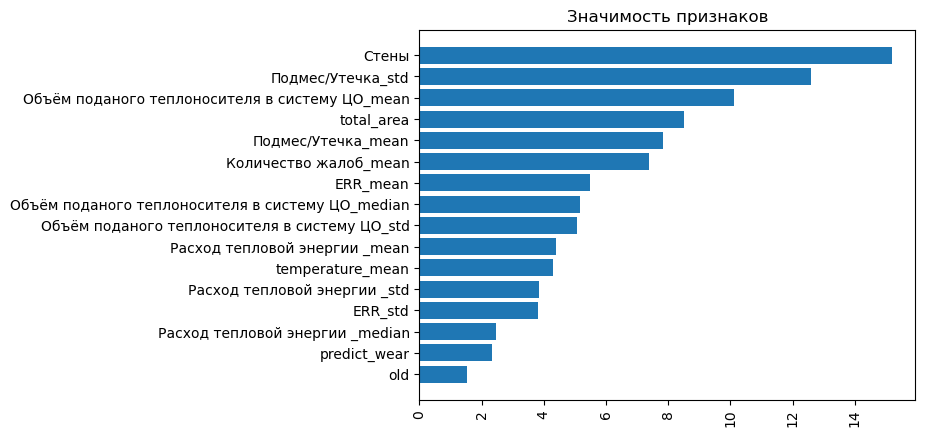

In [189]:
plt.barh(df_bar['fetch'], df_bar['importance'])
plt.xticks(rotation=90)
plt.title('Значимость признаков')
print()

In [160]:
y_pred = cat.predict_proba(X_data)[:, 1]
df_resalt = pd.DataFrame({'UNOM': UNOMS, 'preds': y_pred})

In [161]:
df_resalt = pd.concat([df_resalt, X_data], axis=1)

In [162]:
df_resalt.to_csv('preds_cat.csv')

In [393]:
df_resalt[df_resalt['preds'] > 0.01].sort_values(by='preds', ascending=False).head(50)

,UNOM,preds
3580,2401489,0.873998
3453,2122228,0.867649
3534,2122379,0.867649
3546,2122404,0.867649
3353,2115776,0.861692
3296,2114456,0.861692
3179,2102466,0.861085
3610,2404481,0.860227
3250,2109311,0.860227
3258,2109324,0.860227


In [656]:
3731 / (3731 + 49)

0.987037037037037

Логистическая регрессия

In [200]:
rig = LogisticRegression()

ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=52, stratify=y_data)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
rig.fit(X_train, y_train)
y_pred = rig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67       725
         1.0       0.67      0.70      0.69       725

    accuracy                           0.68      1450
   macro avg       0.68      0.68      0.68      1450
weighted avg       0.68      0.68      0.68      1450



Коиффеценты догистической регрессии

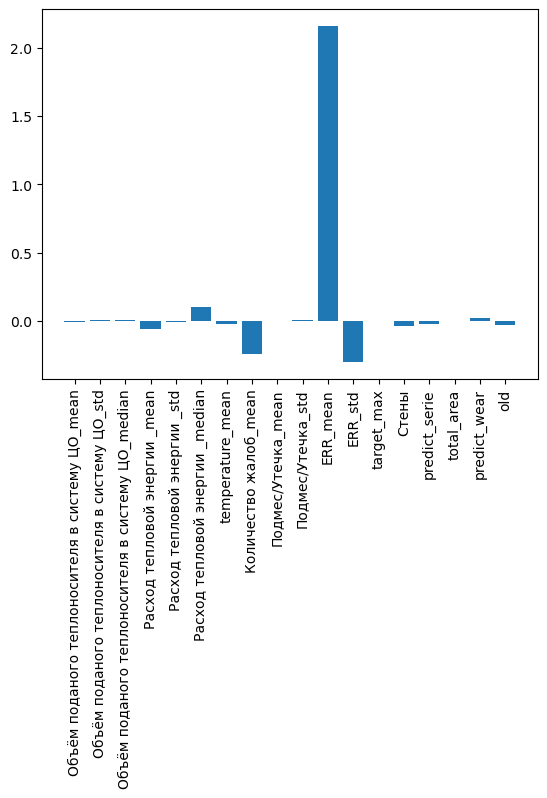

In [59]:
plt.bar(X_train.columns, rig.coef_[0])
plt.xticks(rotation=90)
print()

In [82]:
model = pd.read_pickle('model_rig.pkl')

In [109]:
y_pred = rig.predict(X_data)
print(classification_report(y_data, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      3701
           1       0.02      0.82      0.04        40

    accuracy                           0.58      3741
   macro avg       0.51      0.70      0.39      3741
weighted avg       0.99      0.58      0.73      3741



In [1068]:
y_pred = cat.predict_proba(X_data)[:, 1]
df_resalt = pd.DataFrame({'UNOM': UNOMS, 'preds': y_pred})

df_resalt['preds'].to_csv('preds_rig.csv')

In [166]:
rig = RidgeClassifierCV(alphas=(0.001, 0.1, 1.0, 10.0, 25.0), cv=2)

ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=55, stratify=y_data)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
rig.fit(X_train, y_train)
y_pred = rig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80       725
         1.0       0.75      1.00      0.86       725

    accuracy                           0.84      1450
   macro avg       0.88      0.84      0.83      1450
weighted avg       0.88      0.84      0.83      1450



In [168]:
model = pd.read_pickle('model_rig.pkl')

X_data_, y_data_ = ros.fit_resample(X_data, y_data)
y_pred = model.predict(X_data_)
print(classification_report(y_data_, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      3624
         1.0       0.71      0.79      0.75      3624

    accuracy                           0.73      7248
   macro avg       0.74      0.73      0.73      7248
weighted avg       0.74      0.73      0.73      7248



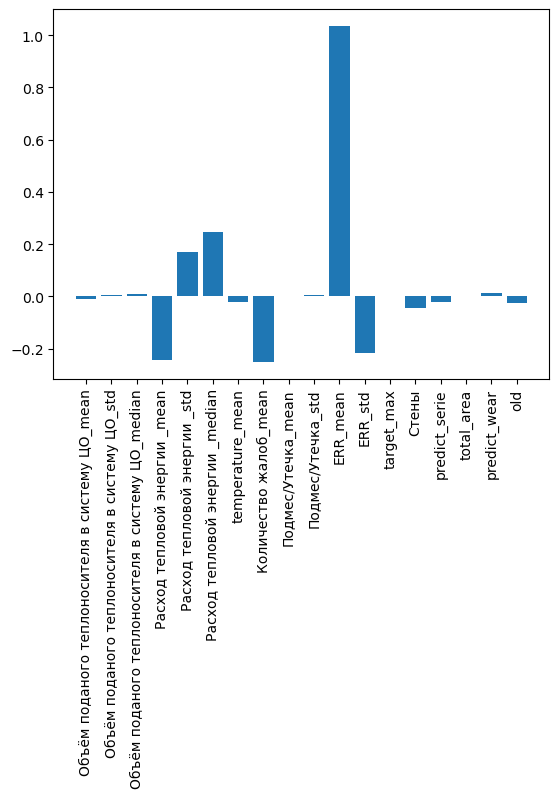

In [104]:
plt.bar(X_train.columns, rig.coef_[0])
plt.xticks(rotation=90)
print()

Нейронная сеть

In [165]:
nn = MLPClassifier(hidden_layer_sizes=(3), learning_rate_init=0.001, random_state=55)

ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=55, stratify=y_data)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.50      0.62       725
         1.0       0.64      0.87      0.73       725

    accuracy                           0.69      1450
   macro avg       0.71      0.69      0.67      1450
weighted avg       0.71      0.69      0.67      1450



Случайный лес

In [681]:
rig = RandomForestClassifier(n_estimators=5, max_depth=1, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
rig.fit(X_train, y_train)
y_pred = rig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66      1446
         1.0       0.65      0.63      0.64      1446

    accuracy                           0.65      2892
   macro avg       0.65      0.65      0.65      2892
weighted avg       0.65      0.65      0.65      2892



Метод опорных векторов

In [680]:
rig = LinearSVC(random_state=42)

ros = RandomOverSampler(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
rig.fit(X_train, y_train)
y_pred = rig.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.99      0.68      1446
         1.0       0.91      0.06      0.12      1446

    accuracy                           0.53      2892
   macro avg       0.71      0.53      0.40      2892
weighted avg       0.71      0.53      0.40      2892



## Находбение отключенных домов по адресам ЦТП

In [ ]:
df_coard = pd.read_excel('data/13. Адресный реестр объектов недвижимости города Москвы.xlsx')
df_coard = df_coard.drop(0)
df_coard = df_coard[['UNOM', 'geodata_center']]
df_coard['UNOM'] = df_coard['UNOM'].astype('int')
df_coard = df_coard.dropna()

def get_coard(row):
    longitude, latitude = row['geodata_center'].split('[')[1].split(']')[0].split(', ')
    row['longitude'] = float(longitude)
    row['latitude'] = float(latitude)
    return row
 
df_coard = df_coard.apply(get_coard, axis=1).drop('geodata_center', axis=1)
df_coard

In [ ]:
df_moek = pd.read_excel('7_Схема_подключений_МОЭК_с_координатами_ЦТП.xlsx')
df_moek = df_moek[['Адрес ТП', 'Адрес строения', 'latitude', 'longitude']]
df_join_adress = pd.read_excel('crossaddress_odpu-moek.xlsx')
df_moek['Адрес строения'] = df_moek['Адрес строения'].replace(df_join_adress['address2'].values, df_join_adress['address1'].values)
df_moek = df_moek.merge(df_ASUPR[['UNOM', 'Адрес']], left_on='Адрес строения', right_on='Адрес', how='left').drop(columns=['Адрес строения'])
df_moek = df_moek.dropna()
df_moek['UNOM'] = df_moek['UNOM'].astype('int')
df_moek

In [ ]:
df_for_tern_off = df_moek.merge(df_coard, left_on='UNOM', right_on='UNOM', how='left').drop_duplicates()
df_for_tern_off.to_pickle('df_for_tern_off.pkl')
df_for_tern_off

In [ ]:
df_for_tern_off = pd.read_pickle('df_for_tern_off.pkl')

def find_ternd_off(adress_list):
    TP_list = []
    houses_list = []
    for adress in adress_list:
        if adress in df_for_tern_off['Адрес ТП'].values:
            TP_list.append(adress)
        else:
            houses_list.append(adress)
    for adress_TP in TP_list:
        for address in df_for_tern_off[df_for_tern_off['Адрес ТП'] == adress_TP]['Адрес'].unique():
            if address not in houses_list:
                houses_list.append(address)
    UNOMS = df_for_tern_off[df_for_tern_off['Адрес'].isin(houses_list)]['UNOM'].unique()
    df_TP = df_for_tern_off[df_for_tern_off['Адрес ТП'].isin(TP_list)][['Адрес ТП', 'latitude_x', 'longitude_x']].drop_duplicates()
    df_houses = df_for_tern_off[df_for_tern_off['Адрес'].isin(houses_list)][['Адрес', 'UNOM', 'longitude_y', 'latitude_y']].drop_duplicates()
    return UNOMS, df_TP, df_houses

UNOMS, df_TP, df_houses = find_ternd_off(['Байкальская ул., д.43, стр.1', 'Кусковская ул., д. 27, к. 1'])

print(UNOMS)
print(df_TP)
print(df_houses)